In [1]:
import pandas as pd
import json

data = pd.read_csv('datasets/Globepay Acceptance Report - Globepay Acceptance Report.csv')
display(data)

,external_ref,status,source,ref,date_time,state,cvv_provided,amount,country,currency,rates
0,nCyEIIGaP5QQ2Wqb-_Rt8,True,GLOBALPAY,evt_1ESgcCOV7fY1ChY1MkZizZt,2019-01-01T00:00:00.000Z,DECLINED,False,1020.46,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
1,ptNiI9B7NNpK7VsMZx6zZ,True,GLOBALPAY,evt_1EBMGCEjEtianKMJaZXOx1y,2019-01-01T04:48:00.000Z,ACCEPTED,False,1582.57,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
2,1GS5BDKBnauCt-3nHPs6x,True,GLOBALPAY,evt_1EOALu0AZqEhZBn9ub_nbcE,2019-01-01T09:36:00.000Z,DECLINED,False,1653.07,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
3,Y_oecYz8GjBDaxmMqkkLQ,True,GLOBALPAY,evt_1ESHsWyaSPqE1mrmJ2B6rvs,2019-01-01T14:24:00.000Z,ACCEPTED,False,2228.17,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
4,LlEs1TnKVa2xX6PH9Zsz0,True,GLOBALPAY,evt_1EjzPk13qLzmvDR_4hXuMMw,2019-01-01T19:12:00.000Z,ACCEPTED,False,2589.92,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
...,...,...,...,...,...,...,...,...,...,...,...
5425,mej1WI86fIPr4fZStA1wx,True,GLOBALPAY,evt_1EhM7CrZvfh_Aw8H-aP-Sgu,2019-06-30T00:00:00.000Z,ACCEPTED,False,178728.10,AE,USD,"{""CAD"":1.3804492977599183,""EUR"":0.701309191107..."
5426,bl5iBGuCq9zNpQDaCGWHP,True,GLOBALPAY,evt_1EuNMahC_lsgbRGMDHcuJdB,2019-06-30T04:48:00.000Z,DECLINED,False,179198.55,AE,USD,"{""CAD"":1.3804492977599183,""EUR"":0.701309191107..."
5427,RPAQwH-O6cBXjzWqS7O6D,True,GLOBALPAY,evt_1EcQnLsAtP8N1mlkTN1j-A1,2019-06-30T09:36:00.000Z,ACCEPTED,False,179388.92,AE,USD,"{""CAD"":1.3804492977599183,""EUR"":0.701309191107..."
5428,SHBEeyLOy4YKGAdYNfoXI,True,GLOBALPAY,evt_1El9nJBqeQtkSiDvhY3KrkV,2019-06-30T14:24:00.000Z,ACCEPTED,False,179982.21,AE,USD,"{""CAD"":1.3804492977599183,""EUR"":0.701309191107..."


# Task #1

1. Outlines the volume (in USD) of the declined payments

,sum,count
state,,
ACCEPTED,299393932.41571,3777
DECLINED,130877578.83076,1653


<AxesSubplot:xlabel='state'>

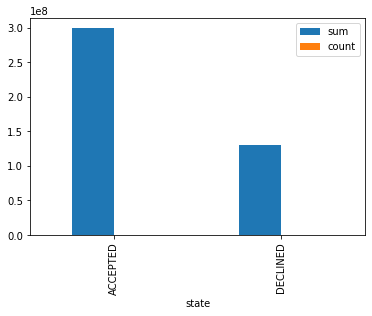

In [15]:
def ConvertToUsd(row):
    rates = json.loads(row['rates'])
    return row['amount'] / rates[row['currency']]

data['amountUS'] = data.apply(lambda x: ConvertToUsd(x),axis=1)


pd.set_option('display.float_format', lambda x: '%.5f' % x)

volumes = data.groupby('state')['amountUS'].agg(['sum','count'])
display(volumes)

pd.options.display.float_format = '{:.2f}'.format
volumes.plot(kind='bar')

# Declined volume is: 130877578.83076

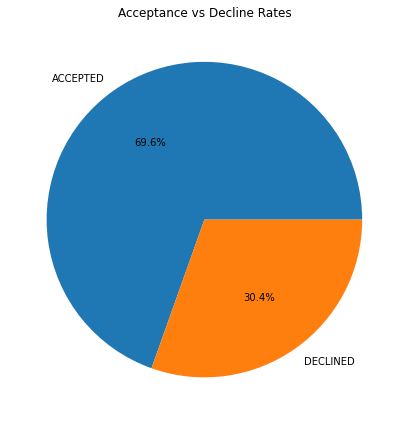

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(volumes['count'], labels=['ACCEPTED','DECLINED'], autopct='%.1f%%')
ax.set_title('Acceptance vs Decline Rates')
plt.tight_layout()

2. Analyses the problem root causes

In [23]:
charge_back_report = pd.read_csv('datasets/Globepay Chargeback Report - Globepay Chargeback Report.csv')
display(charge_back_report)

acceptance_report = data[['external_ref','date_time','state','cvv_provided','country','amountUS','currency']]
merged_data = acceptance_report.merge(charge_back_report,on='external_ref',how='left')
display(merged_data)

,external_ref,status,source,chargeback
0,_-UTDS0dMlagMWEtQKMy-,True,GLOBALPAY,False
1,_0fqf75KiPa0iiviKCSsU,True,GLOBALPAY,False
2,_0H9Ecd_RctsLetId-p14,True,GLOBALPAY,False
3,_0wBrMzAzIhO3fQRWUcBH,True,GLOBALPAY,False
4,_25jZuGDrmwUEdAwKp1xV,True,GLOBALPAY,False
...,...,...,...,...
5425,ZZ5TeAbaeFCUKPK_jpViP,True,GLOBALPAY,False
5426,zzbrqvnMrLFdUbiFjJF54,True,GLOBALPAY,False
5427,ZzMbMDwCgusYokmcZlGOI,True,GLOBALPAY,False
5428,Zzod1Olf10_t46k2Q2au8,True,GLOBALPAY,False


,external_ref,date_time,state,cvv_provided,country,amountUS,currency,status,source,chargeback
0,nCyEIIGaP5QQ2Wqb-_Rt8,2019-01-01T00:00:00.000Z,DECLINED,False,US,1020.46,USD,True,GLOBALPAY,False
1,ptNiI9B7NNpK7VsMZx6zZ,2019-01-01T04:48:00.000Z,ACCEPTED,False,US,1582.57,USD,True,GLOBALPAY,True
2,1GS5BDKBnauCt-3nHPs6x,2019-01-01T09:36:00.000Z,DECLINED,False,US,1653.07,USD,True,GLOBALPAY,False
3,Y_oecYz8GjBDaxmMqkkLQ,2019-01-01T14:24:00.000Z,ACCEPTED,False,US,2228.17,USD,True,GLOBALPAY,True
4,LlEs1TnKVa2xX6PH9Zsz0,2019-01-01T19:12:00.000Z,ACCEPTED,False,US,2589.92,USD,True,GLOBALPAY,True
...,...,...,...,...,...,...,...,...,...,...
5425,mej1WI86fIPr4fZStA1wx,2019-06-30T00:00:00.000Z,ACCEPTED,False,AE,178728.10,USD,True,GLOBALPAY,False
5426,bl5iBGuCq9zNpQDaCGWHP,2019-06-30T04:48:00.000Z,DECLINED,False,AE,179198.55,USD,True,GLOBALPAY,False
5427,RPAQwH-O6cBXjzWqS7O6D,2019-06-30T09:36:00.000Z,ACCEPTED,False,AE,179388.92,USD,True,GLOBALPAY,False
5428,SHBEeyLOy4YKGAdYNfoXI,2019-06-30T14:24:00.000Z,ACCEPTED,False,AE,179982.21,USD,True,GLOBALPAY,False


state     cvv_provided
ACCEPTED  False           3752
          True              25
DECLINED  False           1638
          True              15
Name: status, dtype: int64

<AxesSubplot:xlabel='state,cvv_provided'>

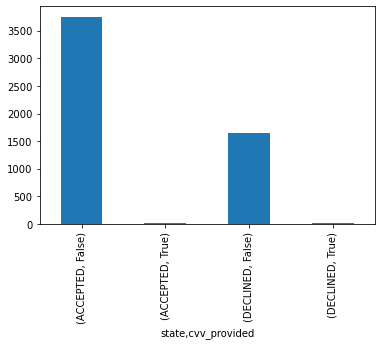

In [21]:
totals = merged_data.groupby(['state','cvv_provided'])['status'].count()
display(totals)
totals.plot(kind='bar')

state     currency
ACCEPTED  CAD          630
          EUR          634
          GBP          647
          MXN          644
          USD         1222
DECLINED  CAD          275
          EUR          271
          GBP          258
          MXN          261
          USD          588
Name: status, dtype: int64


<AxesSubplot:xlabel='state,currency'>

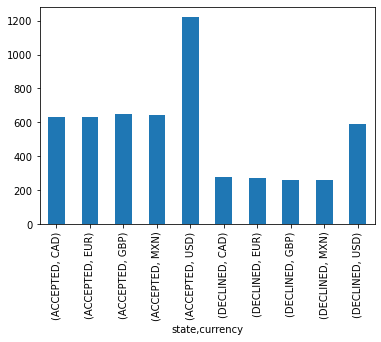

In [22]:
totals = merged_data.groupby(['state','currency'])['status'].count()
print(totals)
totals.plot(kind='bar')

state     country
ACCEPTED  AE         614
          CA         630
          FR         634
          MX         644
          UK         647
          US         608
DECLINED  AE         291
          CA         275
          FR         271
          MX         261
          UK         258
          US         297
Name: status, dtype: int64


<AxesSubplot:xlabel='state,country'>

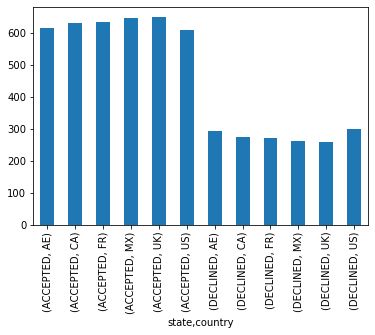

In [24]:
totals = merged_data.groupby(['state','country'])['status'].count()
print(totals)
totals.plot(kind='bar')